# **Training Part**

In [2]:
import os
import cv2
# Pillow module to import images,numpy and pandas for csv files
from PIL import Image

import numpy as np
import pandas as pd

import random

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow.keras as keras
print("Tensorflow Version Should be 2.1: ", tf.__version__)
print("Keras Version: ", keras.__version__)

# Build neural network 
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Tensorflow Version Should be 2.1:  2.3.1
Keras Version:  2.4.0


In [3]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

#  restrincting image size to 30x30
height = 30
width = 30
# RGB channl
channels = 3
# no of classes
num_classes = 43

# neural network input 
n_inputs = height * width*channels


for i in range(num_classes) :
    path = "./gtsrb-dataset/Train/{}/".format(i)
    Class=os.listdir(path)
    
    for a in Class:
        try:
            image=cv2.imread(path+a) # reading images in ith file.
            image_from_array = Image.fromarray(image, 'RGB')  
            size_image = image_from_array.resize((height, width))
            
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print("Error! goruntuyu alamadik.")
            
x_train=np.array(data)
x_train= x_train/255.0

y_train=np.array(labels)
# from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes) # Using one hot encoding

In [4]:
#split data in train and valid
X_train,X_valid,Y_train,Y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state=0) # X_valid = X_test olarak dusunebiliriz
print("Train :", X_train.shape)
print("Valid :", X_valid.shape)

Train : (27446, 30, 30, 3)
Valid : (11763, 30, 30, 3)


Train images


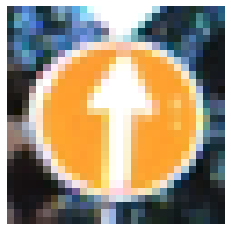

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


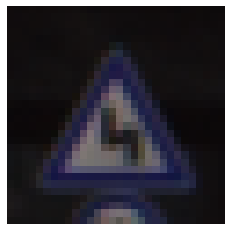

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


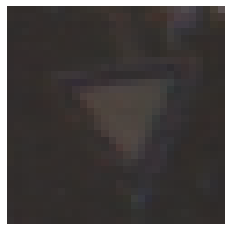

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
# Show Train images 
import matplotlib.pyplot as plt

def show_images(images, labels, amount):
    for i in range(amount):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()       
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

print("Train images")
show_images(X_train, Y_train, 3)

In [6]:
# Build Model
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:])) # input layer + convolution layer
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax')) # class'i belirleyen layer

model.summary() # ???

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [7]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train Model
epochs = 10
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)

Epoch 1/10
858/858 [==============================] - 113s 132ms/step - loss: 1.3439 - accuracy: 0.6239 - val_loss: 0.1373 - val_accuracy: 0.9659
Epoch 2/10
858/858 [==============================] - 112s 130ms/step - loss: 0.2548 - accuracy: 0.9225 - val_loss: 0.0811 - val_accuracy: 0.9776
Epoch 3/10
858/858 [==============================] - 110s 128ms/step - loss: 0.1454 - accuracy: 0.9548 - val_loss: 0.0406 - val_accuracy: 0.9901
Epoch 4/10
858/858 [==============================] - 111s 129ms/step - loss: 0.1021 - accuracy: 0.9681 - val_loss: 0.0316 - val_accuracy: 0.9911
Epoch 5/10
858/858 [==============================] - 110s 129ms/step - loss: 0.0860 - accuracy: 0.9735 - val_loss: 0.0274 - val_accuracy: 0.9930
Epoch 6/10
858/858 [==============================] - 109s 127ms/step - loss: 0.0683 - accuracy: 0.9792 - val_loss: 0.0199 - val_accuracy: 0.9953
Epoch 7/10
858/858 [==============================] - 109s 127ms/step - loss: 0.0663 - accuracy: 0.9793 - val_loss: 0.0194 -

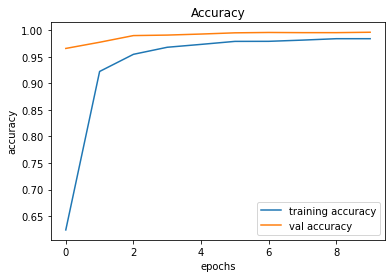

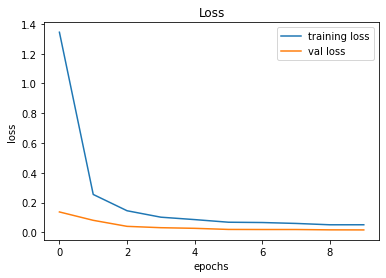

In [9]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [13]:
# Predicting Test data 
y_test=pd.read_csv("./gtsrb-dataset/Test.csv")
labels=y_test['Path'].values
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('./test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255  
pred = model.predict_classes(X_test)

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [ ]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

In [ ]:
print("pred: ", pred, " Type: ", type(pred), " shape: ", pred.shape)

In [ ]:
print("X_test: ", X_test, " Type: ", type(X_test), " shape: ", X_test.shape)

In [ ]:
first_in = 1
second_in = 2
class_of_prediction = model.predict_classes(X_test[first_in:second_in])[0]

In [ ]:
class_of_prediction

In [ ]:
sinif = 1
if(class_of_prediction == sinif):
    print("Birinci Sinif")